## Data Fields

  * **Survival** - Survival. 0 = No, 1 = Yes
  * **Pclass** - Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
  * **Sex** - Sex.
  * **Age** - Age in years.
  * **SibSp** - # of siblings / spouses aboard the Titanic.
  * **Parch** - # of parents / children aboard the Titanic.
  * **Ticket** - Ticket number.
  * **Fare** - Passenger fare.
  * **Cabin** - Cabin number.
  * **Embarked** - Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('data/train.csv')
train.shape

(891, 12)

In [3]:
test = pd.read_csv('data/test.csv')
test.shape

(418, 11)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train['Age_mean'] = train['Age']
train['Age_mean'].fillna(train['Age'].mean(), inplace=True)

In [9]:
test['Age_mean'] = test['Age']
test['Age_mean'].fillna(test['Age'].mean(), inplace=True)

In [10]:
train['Age'].isnull().sum()

177

In [11]:
train['Age_mean'].isnull().sum()

0

In [12]:
train['Age_mean'].mean()

29.69911764705882

In [13]:
train['Age'].mean()

29.69911764705882

# One-Hot-Encoding

In [14]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train['Gender'] = (train['Sex'] == 'female')
test['Gender'] = (test['Sex'] == 'female')

In [16]:
train['Gender'].head()

0    False
1     True
2     True
3     True
4    False
Name: Gender, dtype: bool

In [17]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
train['Embarked'].isnull().sum()

2

In [19]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [20]:
test['Embarked'].isnull().sum()

0

In [21]:
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_Q'] = train['Embarked'] == 'Q'

In [22]:
train['Embarked_S'].head()

0     True
1    False
2     True
3     True
4     True
Name: Embarked_S, dtype: bool

In [23]:
train['Embarked_S'].sum()

644

In [24]:
train['Embarked_C'].sum()

168

In [25]:
train['Embarked_Q'].sum()

77

In [26]:
train[['Embarked', 'Embarked_S', 'Embarked_C', 'Embarked_Q']].head()

,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,S,True,False,False
1,C,False,True,False
2,S,True,False,False
3,S,True,False,False
4,S,True,False,False


In [27]:
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_Q'] = test['Embarked'] == 'Q'

# 가족 수 구하기

In [28]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q'],
      dtype='object')

In [29]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [30]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [31]:
train['Family'] = train['FamilySize']
train.loc[train['FamilySize'] == 1, 'Family'] = 'S'
train.loc[(train['FamilySize'] > 1) & (train['FamilySize'] < 5), 'Family'] = 'M'
train.loc[train['FamilySize'] > 4, 'Family'] = 'L'

In [32]:
train[['Family', 'FamilySize']].head()

,Family,FamilySize
0,M,2
1,M,2
2,S,1
3,M,2
4,S,1


In [33]:
train['Family_S'] = train['Family'] == 'S'
train['Family_M'] = train['Family'] == 'M'
train['Family_L'] = train['Family'] == 'L'

In [34]:
train[['FamilySize', 'Family', 'Family_S', 'Family_M', 'Family_L']].head()

,FamilySize,Family,Family_S,Family_M,Family_L
0,2,M,False,True,False
1,2,M,False,True,False
2,1,S,True,False,False
3,2,M,False,True,False
4,1,S,True,False,False


In [35]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['Family'] = test['FamilySize']
test.loc[test['FamilySize'] == 1, 'Family'] = 'S'
test.loc[(test['FamilySize'] > 1) & (test['FamilySize'] < 5), 'Family'] = 'M'
test.loc[test['FamilySize'] > 4, 'Family'] = 'L'

In [36]:
test['Family_S'] = test['Family'] == 'S'
test['Family_M'] = test['Family'] == 'M'
test['Family_L'] = test['Family'] == 'L'

In [37]:
train['Family'].value_counts()

S    537
M    292
L     62
Name: Family, dtype: int64

In [38]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [39]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize', 'Family',
       'Family_S', 'Family_M', 'Family_L'],
      dtype='object')

In [40]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# Feature Selection

In [41]:
feature_names = ['Gender', 'Age_mean', 
                 'Embarked_S', 'Embarked_C', 'Embarked_Q', 
                 'Family_S', 'Family_M', 'Family_L']

In [42]:
X_train = train[feature_names]
X_train.head()

,Gender,Age_mean,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L
0,False,22.0,True,False,False,False,True,False
1,True,38.0,False,True,False,False,True,False
2,True,26.0,True,False,False,True,False,False
3,True,35.0,True,False,False,False,True,False
4,False,35.0,True,False,False,True,False,False


In [43]:
y_label = train['Survived']

In [44]:
X_test = test[feature_names]
X_test.head()

,Gender,Age_mean,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L
0,False,34.5,False,False,True,True,False,False
1,True,47.0,True,False,False,False,True,False
2,False,62.0,False,False,True,True,False,False
3,False,27.0,True,False,False,True,False,False
4,True,22.0,True,False,False,False,True,False


# Modeling

In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=2018)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best')

In [46]:
model.fit(X_train, y_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best')

In [47]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=2018)

In [48]:
scoring = 'accuracy'
score = cross_val_score(model, X_train, y_label, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score)

[0.83333333 0.87640449 0.87640449 0.83146067 0.84269663 0.78651685
 0.80898876 0.83146067 0.69662921 0.83146067]


In [49]:
round(np.mean(score)*100, 2)

82.15

In [50]:
prediction = model.predict(X_test)

In [51]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
test['Survived'] = prediction

In [53]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize', 'Family',
       'Family_S', 'Family_M', 'Family_L', 'Survived'],
      dtype='object')

In [54]:
submissions = test[['PassengerId', 'Survived']]
submissions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [55]:
submissions.to_csv('submissions/submit.csv', index=False)

In [56]:
# %pwd

#  [graphviz 설치](https://www.graphviz.org/download/)
```
!pip install graphviz
```

### Win

1. https://www.graphviz.org/download/ 에서 윈도우용 인스톨러를 다운로드 받아 설치
2. 노트북에서 다음의 경로로 그래프비즈를 불러옴(각자의 환경에 따라 경로가 다를 수도 있음)
```
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
```

### OSX
```
$ brew install graphviz
```

```
import os
os.environ["PATH"] += os.pathsep + r'/Users/username/anaconda3/pkgs/graphviz-2.38.0-4/bin'
```

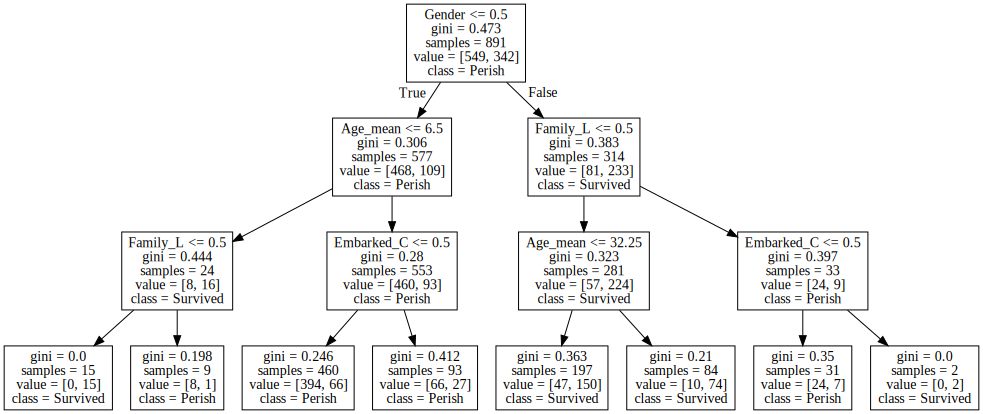

In [57]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)